In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/AML/HW1

/content/drive/MyDrive/AML/HW1


## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [ ]:
# Load the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


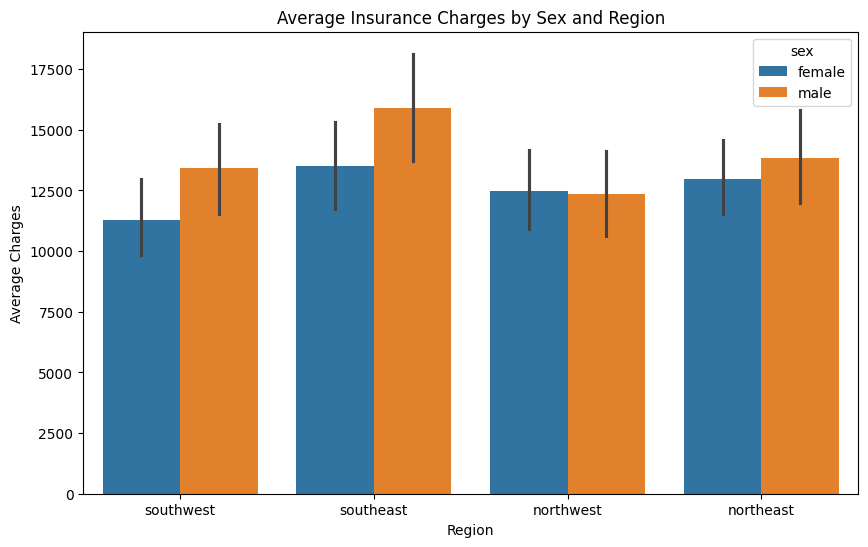

In [ ]:
### Code here
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='sex', data=insurance_df)
plt.title('Average Insurance Charges by Sex and Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

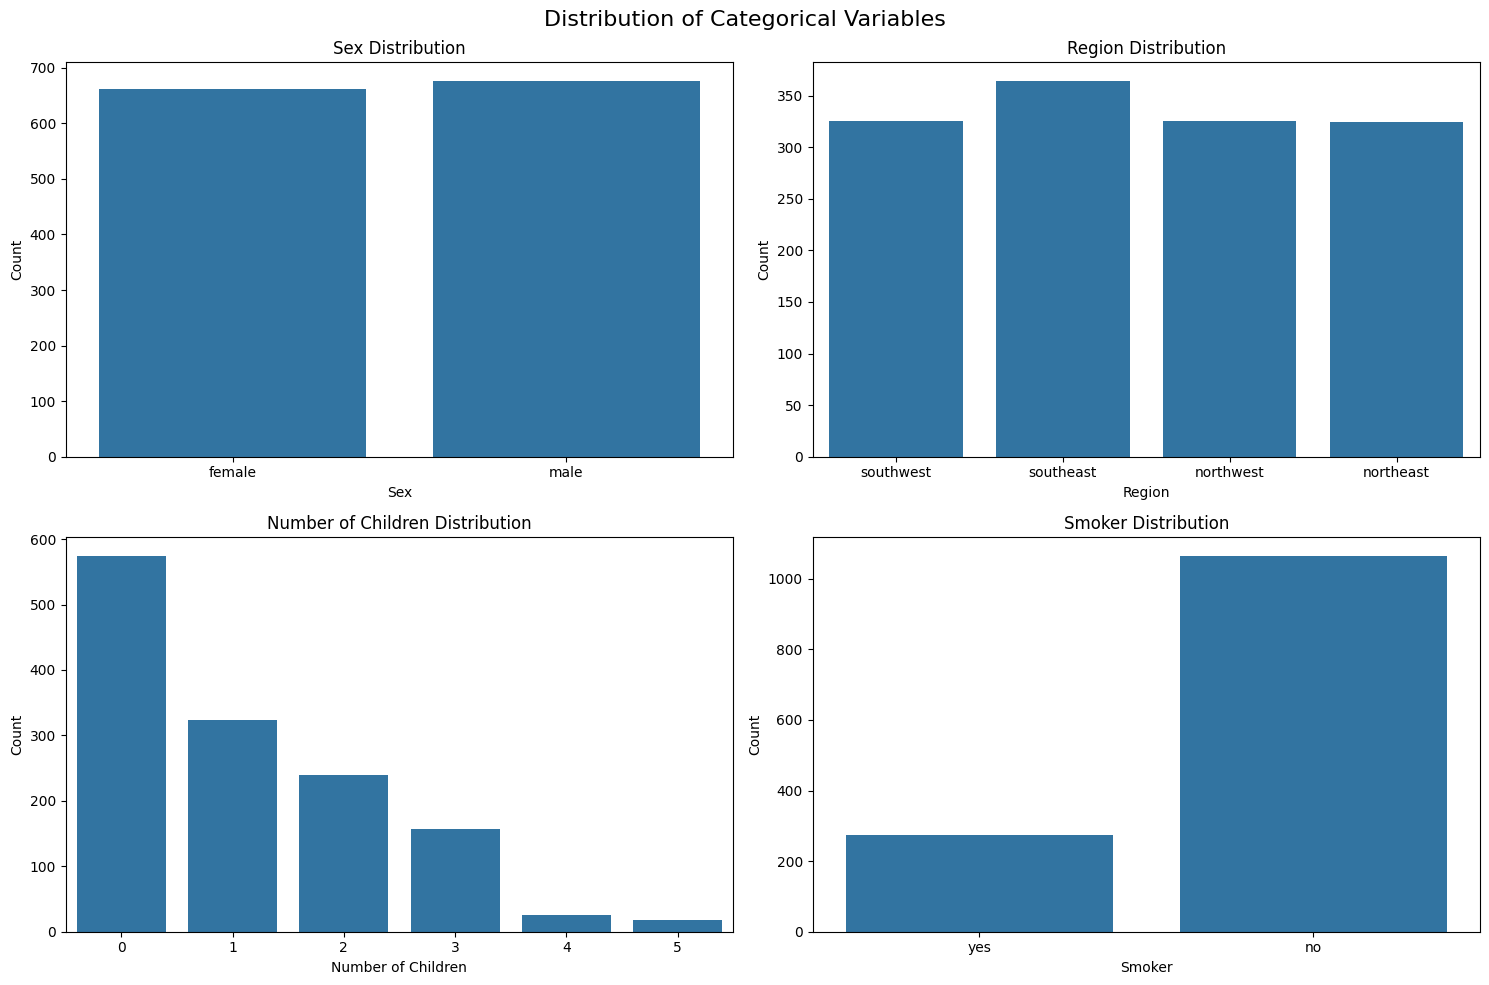

In [ ]:
### Code here
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

sns.countplot(x='sex', data=insurance_df, ax=axes[0, 0])
axes[0, 0].set_title('Sex Distribution')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='region', data=insurance_df, ax=axes[0, 1])
axes[0, 1].set_title('Region Distribution')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='children', data=insurance_df, ax=axes[1, 0])
axes[1, 0].set_title('Number of Children Distribution')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='smoker', data=insurance_df, ax=axes[1, 1])
axes[1, 1].set_title('Smoker Distribution')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

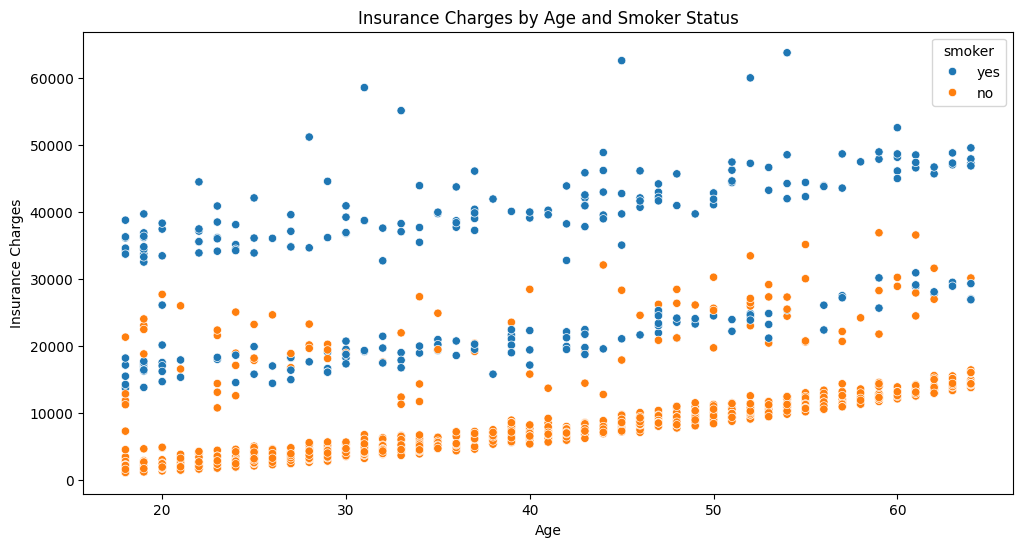

In [ ]:
### Code here
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance_df)
plt.title('Insurance Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [ ]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

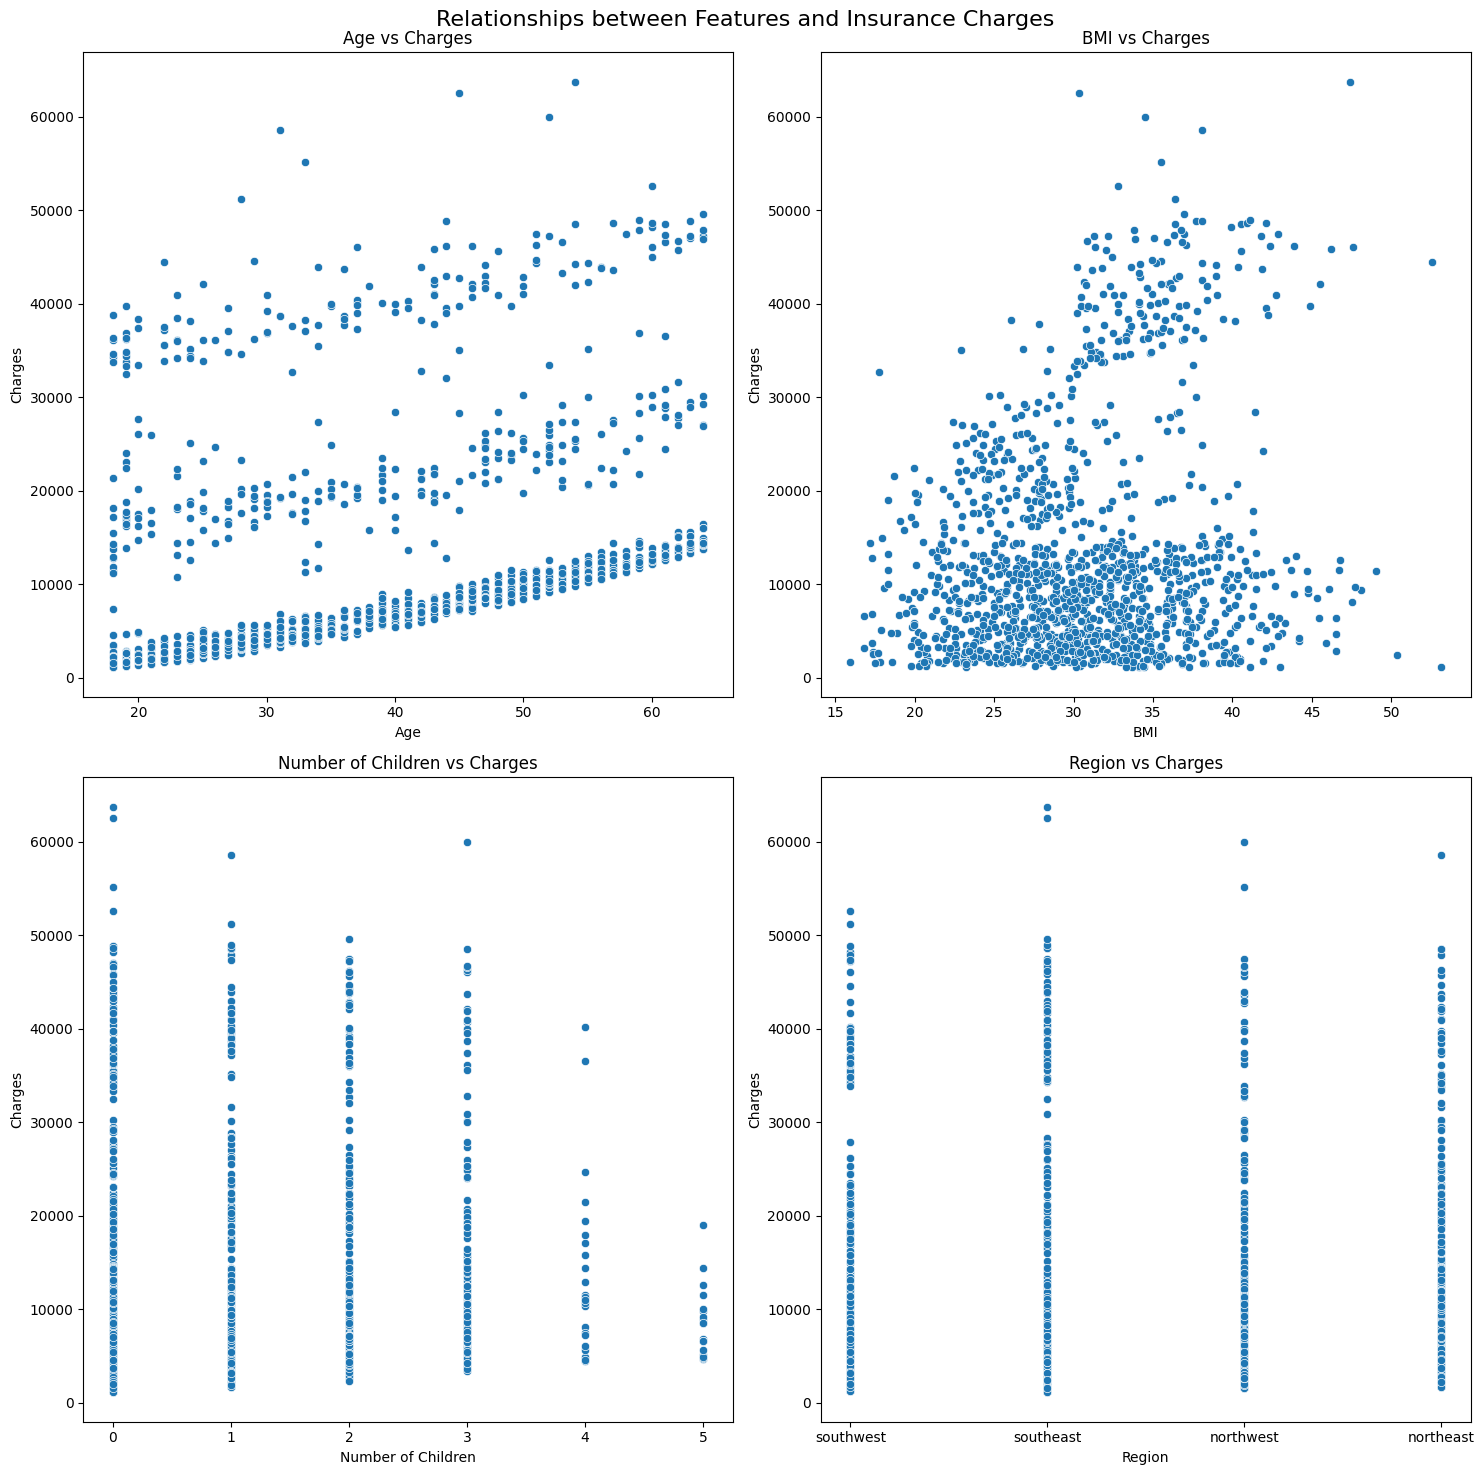

In [ ]:
### Code here
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Relationships between Features and Insurance Charges', fontsize=16)

sns.scatterplot(x='age', y='charges', data=insurance_df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')

sns.scatterplot(x='bmi', y='charges', data=insurance_df, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

sns.scatterplot(x='children', y='charges', data=insurance_df, ax=axes[1, 0])
axes[1, 0].set_title('Number of Children vs Charges')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Charges')

sns.scatterplot(x='region', y='charges', data=insurance_df, ax=axes[1, 1])
axes[1, 1].set_title('Region vs Charges')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Charges')

plt.tight_layout()
plt.show()

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


In [ ]:
### Comment here

1. Age vs Charges:
   There appears to be a positive correlation between age and charges, which could potentially be modeled linearly.

2. BMI vs Charges:
   The relationship between BMI and charges is somewhat linear, but there seems to be a cluster of lower charges regardles of the BMIs.

3. Number of Children vs Charges:
   This relationship appears to be relatively weak and non-linear because the distribution of charges looks similar across different numbers of children, with perhaps a slight decrease as the number of children increases.

4. Region vs Charges:
   This relationship appears to be relatively weak and non-linear because the distribution of charges seems similar across different regions.

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [ ]:
### Code here
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['sex', 'smoker', 'region']
encoded_features = encoder.fit_transform(insurance_df[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

In [ ]:
### Code here
insurance_encoded = pd.concat([
    insurance_df.drop(columns=categorical_features),
    pd.DataFrame(encoded_features, columns=encoded_feature_names, index=insurance_df.index)
], axis=1)
insurance_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

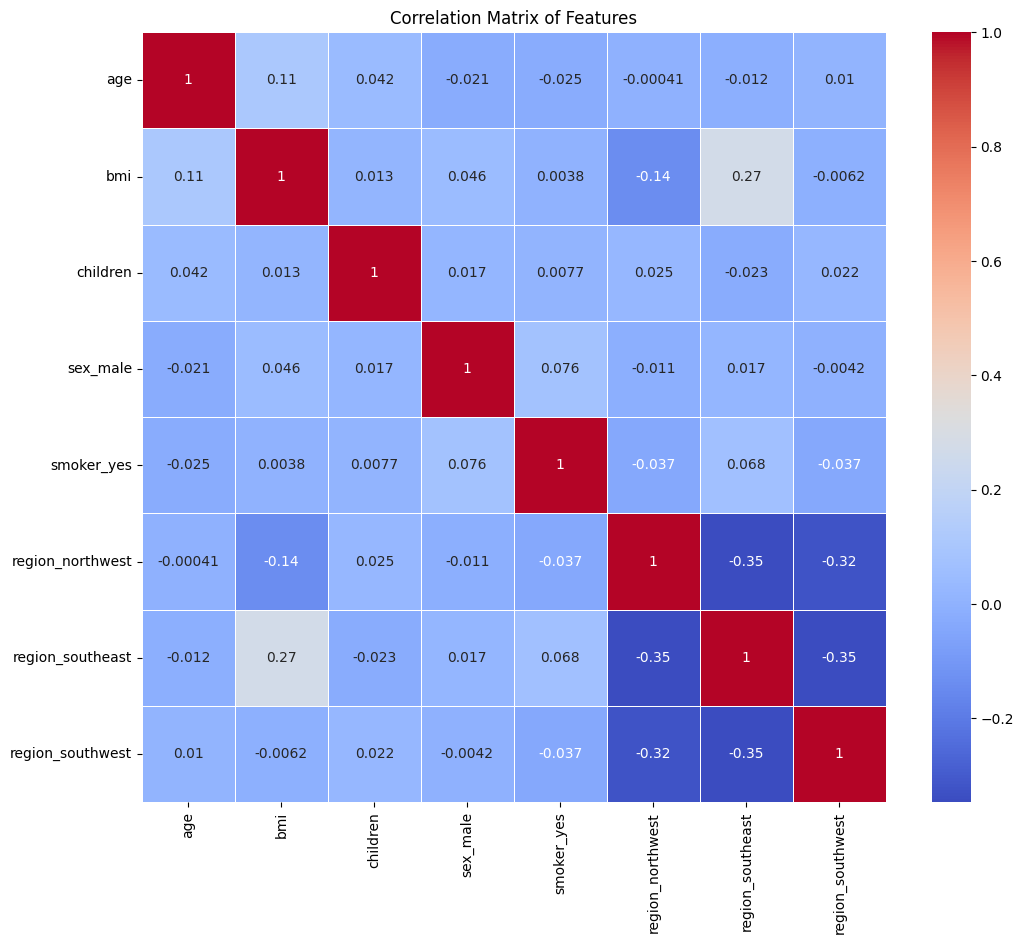

In [ ]:
### Code here
plt.figure(figsize=(12, 10))
correlation_matrix = insurance_encoded.drop(columns=['charges']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
### Code here
high_corr = np.where(np.abs(correlation_matrix) >= 0.8)
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                  for x, y in zip(*high_corr) if x != y and x < y]
high_corr_list

[]

In [ ]:
### Comment here

This helps identify potential multicollinearity issues, which can make the model unstable and difficult to interpret. If two features are highly correlated, they provide similar information, and including both might not improve the model while increasing complexity. Removing one of a highly correlated pair can lead to a more robust and interpretable model.

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [ ]:
### Code here
X = insurance_encoded.drop(columns=['charges'])
y = insurance_encoded['charges']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

**2.1.6 Standardize the columns in the feature matrices.**

In [ ]:
### Code here
numerical_features = ['age', 'bmi', 'children']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Adding a column of ones to include the bias term
insurance_X_train = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
insurance_X_val = np.hstack([np.ones((X_val_scaled.shape[0], 1)), X_val_scaled])
insurance_X_test = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

insurance_y_train = y_train.values
insurance_y_val = y_val.values
insurance_y_test = y_test.values

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [ ]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        n = X.shape[1]
        I = np.eye(n)
        self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return X @ self.w

**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [ ]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [ ]:
### Code here
# Train
model = LinearRegression(alpha=0)
model.train(insurance_X_train, insurance_y_train)

# Predict
y_train_pred = model.predict(insurance_X_train)
y_val_pred = model.predict(insurance_X_val)
y_test_pred = model.predict(insurance_X_test)

# R2 scores
r2_train = r2_score(insurance_y_train, y_train_pred)
r2_val = r2_score(insurance_y_val, y_val_pred)
r2_test = r2_score(insurance_y_test, y_test_pred)

print(f"R2 scores: Train: {r2_train:.4f}, Validation: {r2_val:.4f}, Test: {r2_test:.4f}")

# Report
print(get_report(y_test_pred, insurance_y_test))

R2 scores: Train: 0.7457, Validation: 0.7283, Test: 0.7826
            Prediction       Actual
Position                           
1          8822.361197   9095.06825
2          6919.890821   5272.17580
3         36208.994457  29330.98315
266        7454.552824   6067.12675
267       40531.472584  63770.42801
268       12267.581092   9872.70100


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [ ]:
### Code here
mean_prediction = np.mean(insurance_y_train)
baseline_train_pred = np.full_like(insurance_y_train, mean_prediction)
baseline_val_pred = np.full_like(insurance_y_val, mean_prediction)
baseline_test_pred = np.full_like(insurance_y_test, mean_prediction)

r2_baseline_train = r2_score(insurance_y_train, baseline_train_pred)
r2_baseline_val = r2_score(insurance_y_val, baseline_val_pred)
r2_baseline_test = r2_score(insurance_y_test, baseline_test_pred)

print(f"Baseline R2 scores: Train: {r2_baseline_train:.4f}, Validation: {r2_baseline_val:.4f}, Test: {r2_baseline_test:.4f}")

Baseline R2 scores: Train: 0.0000, Validation: -0.0089, Test: -0.0000


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

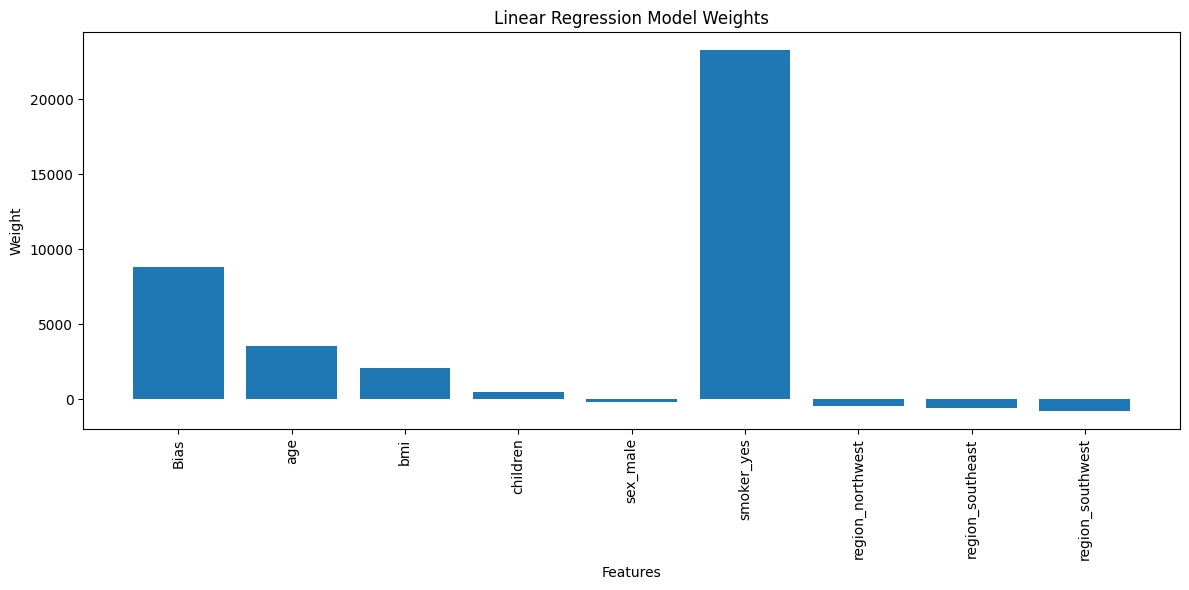

In [ ]:
### Code here
feature_names = ['Bias'] + list(X.columns)
plt.figure(figsize=(12, 6))
plt.bar(feature_names, model.w)
plt.title('Linear Regression Model Weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

In [ ]:
### Comment here

1. The smoker_yes feature is by far the most significant contributor to insurance charges. Being a smoker greatly increases the predicted charges.
2. Age is the second most important factor, with older individuals likely facing higher charges.
3. BMI is the third most influential feature, suggesting that higher BMI is associated with higher insurance charges.
4. The number of children has a moderate positive impact on charges.
5. Regional differences exist but have relatively smaller impacts compared to the top factors.
6. Sex (being male) has the smallest impact among these features, with a slight negative effect on charges

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

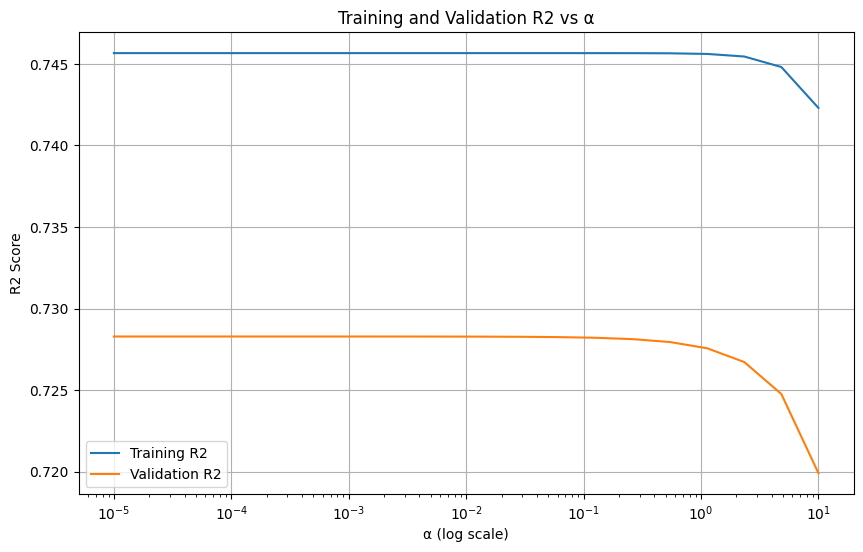

In [ ]:
### Code here
alphas = np.logspace(-5, 1, 20)
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(insurance_X_train, insurance_y_train)
    y_train_pred = model.predict(insurance_X_train)
    y_val_pred = model.predict(insurance_X_val)
    train_r2_scores.append(r2_score(insurance_y_train, y_train_pred))
    val_r2_scores.append(r2_score(insurance_y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_r2_scores, label='Training R2')
plt.semilogx(alphas, val_r2_scores, label='Validation R2')
plt.xlabel('α (log scale)')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 vs α')
plt.legend()
plt.grid(True)
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

In [ ]:
### Comment here

Overall trend: Both training and validation R2 scores decrease as α increases, but the decrease is very slight until α reaches higher values.
The model maintains high R2 scores (above 0.72) even with substantial regularization, suggesting it's quite stable.

Training R2: Starts at 0.7456575 for the smallest α and gradually decreases.
The decrease is minimal until α reaches around 0.1, after which the decline becomes more noticeable. At the highest α (10), it drops to 0.7453418, which is still very close to the unregularized performance.


Validation R2: Begins at 0.7282907 and follows a similar pattern to the training R2. The decrease is also minimal for small α values and becomes more pronounced for α > 0.1. At the highest α, it drops to 0.7252332, showing a slightly larger decrease compared to the training R2.

Overfitting and Underfitting: The small gap between training and validation R2 scores suggests that the model isn't severely overfitting, even with minimal regularization.
As α increases, both scores decrease, but the gap between them slightly narrows, indicating a small reduction in overfitting.

Optimal α: Given that the validation R2 doesn't improve with increasing α, the optimal value appears to be at or near the smallest α tested (1e-5).
This suggests that the model benefits little from regularization on this dataset, possibly because it's not overfitting significantly to begin with.

In conclusion, while regularization does have some effect on the model's performance, the impact is relatively small across a wide range of α values. This indicates that the linear regression model is quite robust for this dataset, and the features selected are likely good predictors of insurance charges without needing strong regularization to prevent overfitting.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [5]:
### Code here
loan_data_df = pd.read_csv('loan_data.csv')
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [ ]:
### Code here
missing_values = loan_data_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
### Code here
from sklearn.impute import SimpleImputer

# For categorical features (use mode)
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
imputer_cat = SimpleImputer(strategy='most_frequent')
loan_data_df[categorical_features] = imputer_cat.fit_transform(loan_data_df[categorical_features])

# For numerical features (use median for better robustness)
numerical_features = ['LoanAmount', 'Loan_Amount_Term']
imputer_num = SimpleImputer(strategy='median')
loan_data_df[numerical_features] = imputer_num.fit_transform(loan_data_df[numerical_features])

In [ ]:
### Comment here

1. Gender, Married, Dependents, Self_Employed (Categorical)
Approach: Since these are categorical features, the best approach is to use the most frequent value (mode) to fill in the missing values.
2. LoanAmount, Loan_Amount_Term (Numerical)
Approach: For numerical features like LoanAmount and Loan_Amount_Term, you can use either the mean or the median to impute missing values. Median is generally preferred if the data contains outliers.
3. Credit_History (Binary)
Approach: This is a binary categorical feature, so imputing with the most frequent value (mode) is a reasonable option.

**2.2.3 Encode the categorical variables.**

In [8]:
### Code here
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(loan_data_df[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

In [9]:
### Code here
loan_data_encoded = pd.concat([
    loan_data_df.drop(columns=categorical_columns + ['Loan_Status']),
    pd.DataFrame(encoded_features, columns=encoded_feature_names, index=loan_data_df.index)
], axis=1)

In [ ]:
### Code here
# loan_amount_term_order = [12, 36, 60, 84, 120, 180, 240, 300, 360, 480]
# loan_data_df['Loan_Amount_Term'] = pd.Categorical(loan_data_df['Loan_Amount_Term'], categories=loan_amount_term_order, ordered=True)
# encoder_ordinal = OrdinalEncoder()
# encoded_loan_amount_term = encoder_ordinal.fit_transform(loan_data_df[['Loan_Amount_Term']])

# loan_data_encoded = pd.concat([
#     loan_data_df.drop(columns=categorical_columns + ['Loan_Status', 'Loan_Amount_Term']),
#     pd.DataFrame(encoded_features, columns=encoded_feature_names, index=loan_data_df.index),
#     pd.DataFrame(encoded_loan_amount_term, columns=['Loan_Amount_Term'], index=loan_data_df.index)
# ], axis=1)

In [10]:
### Code here
loan_data_encoded['Loan_Status'] = loan_data_df['Loan_Status'].map({'Y': 1, 'N': 0})

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [ ]:
### Code here
label_distribution = loan_data_df['Loan_Status'].value_counts(normalize=True)
print("\nLabel distribution:\n", label_distribution)


Label distribution:
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [ ]:
### Comment here

The label distribution shows that the dataset is somewhat imbalanced since 68.73% of the loans were approved (Y) and 31.27% of the loans were not approved (N).

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

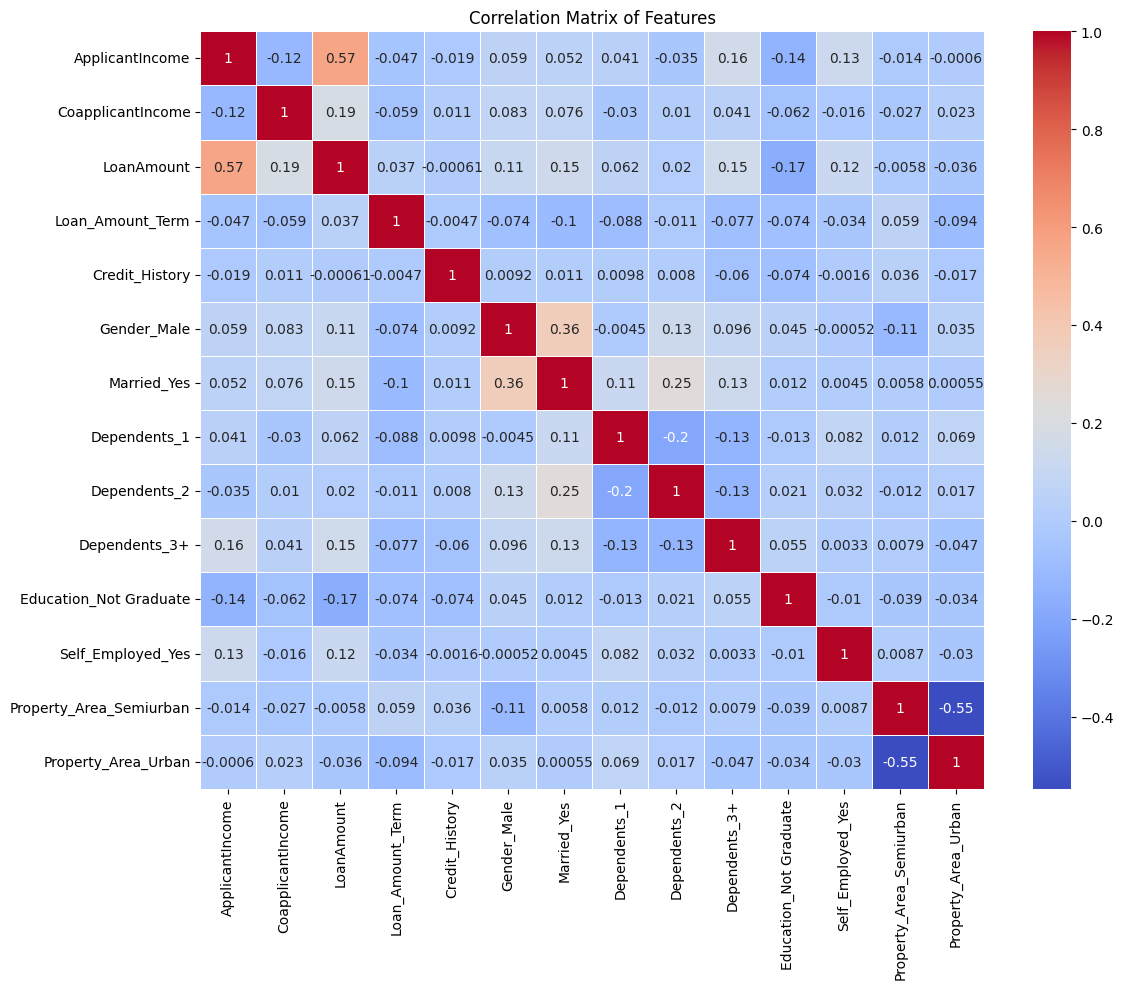

In [11]:
### Code here
X = loan_data_encoded.drop('Loan_Status', axis=1)
y = loan_data_encoded['Loan_Status']

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [ ]:
### Code here
high_corr_threshold = 0.9
high_corr_features = set()
for i in range(len(X.columns)):
    for j in range(i):
        if abs(X.iloc[:, i].corr(X.iloc[:, j])) >= high_corr_threshold:
            colname = X.columns[i]
            high_corr_features.add(colname)
high_corr_features

set()

In [ ]:
### Code here
X = X.drop(columns=high_corr_features)

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [12]:
### Code here
y = y.values.reshape(-1, 1)

In [13]:
### Code here
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [14]:
### Code here
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [15]:
### Code here
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_val_scaled = np.hstack([np.ones((X_val_scaled.shape[0], 1)), X_val_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [ ]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

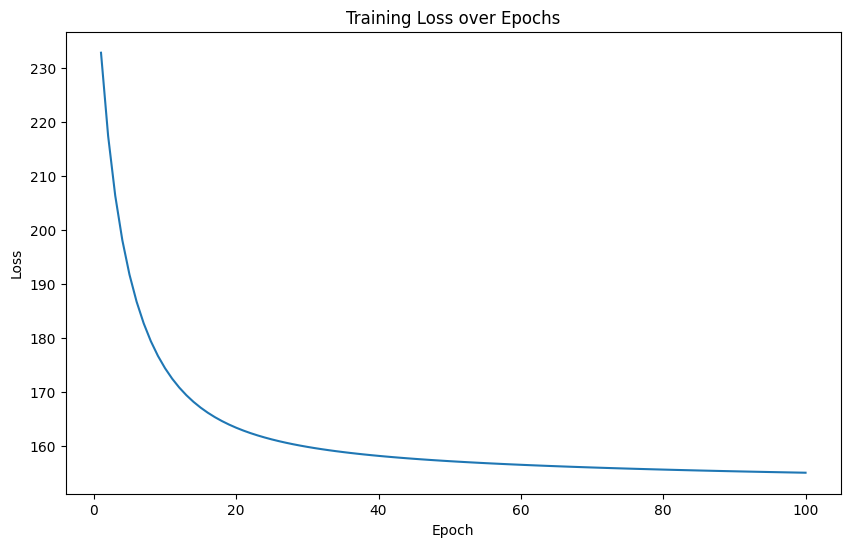

In [ ]:
### Code here
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = model.train(X_train_scaled, y_train)

loss_values = [loss.item() for loss in losses]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
### Code here
from sklearn.metrics import accuracy_score

alpha_values = np.random.uniform(0, 1, 20)
eta_values = np.random.uniform(0, 0.001, 20)
t_values = np.random.randint(1, 101, 20)

best_accuracy = 0
best_params = {}

for alpha, eta, t in zip(alpha_values, eta_values, t_values):
    mdl = LogisticRegression(alpha=alpha, t=t, eta=eta)
    mdl.train(X_train_scaled, y_train)

    y_pred = mdl.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'alpha': alpha, 'eta': eta, 't': t}

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'alpha': 0.4691041397836482, 'eta': 0.0006225287024982001, 't': 79}
Best Accuracy: 0.7723577235772358


In [ ]:
### Code here
best_model = LogisticRegression(alpha=best_params['alpha'], t=best_params['t'], eta=best_params['eta'])
best_model.train(X_train_scaled, y_train)

In [ ]:
### Code here
y_test_pred_default = model.predict(X_test_scaled)
y_test_pred_best = best_model.predict(X_test_scaled)

print("Test accuracy (default):", accuracy_score(y_test, y_test_pred_default))
print("Test accuracy (best):", accuracy_score(y_test, y_test_pred_best))

Test accuracy (default): 0.7886178861788617
Test accuracy (best): 0.7886178861788617


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

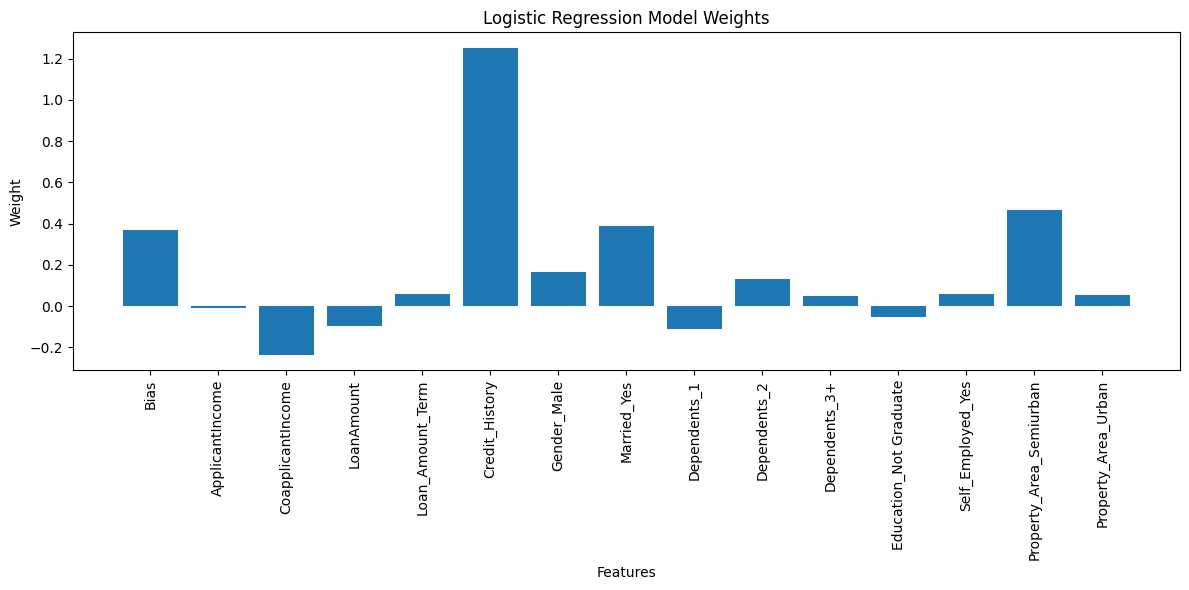

In [ ]:
### Code here
feature_names = ['Bias'] + list(X.columns)
plt.figure(figsize=(12, 6))
plt.bar(feature_names, best_model.w.flatten())
plt.title('Logistic Regression Model Weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
### Comment here

1. Credit_History is the most significant contributor to loan approval predictions. A positive credit history strongly increases the likelihood of loan approval.

2. Property_Area_Semiurban has the second highest positive impact, indicating that applicants from semi-urban areas are more likely to have their loans approved compared to rural areas (the implicit reference category).

3. Married_Yes has a moderate positive impact, suggesting married applicants have a slightly higher chance of loan approval.

4. CoapplicantIncome has a negative impact, which might indicate that higher coapplicant income slightly decreases the chances of loan approval. This could be due to various factors and might warrant further investigation.

5. Gender (being male) and LoanAmount both have small impacts, suggesting that being female and larger loan amounts slightly decrease approval chances.

6. Education, ApplicantIncome, Loan_Amount_Term, and other features generally show small contributions, suggesting that these factors may have little impact on loan approval likelihood.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [ ]:
### Code here
primal_svm = LinearSVC(dual=False, random_state=42)
primal_svm.fit(X_train_scaled, y_train.ravel())

y_train_pred_primal = primal_svm.predict(X_train_scaled)
y_val_pred_primal = primal_svm.predict(X_val_scaled)
y_test_pred_primal = primal_svm.predict(X_test_scaled)

In [ ]:
### Code here
from sklearn.metrics import accuracy_score

print("Primal SVM Accuracies:")
print("Train:", accuracy_score(y_train, y_train_pred_primal))
print("Validation:", accuracy_score(y_val, y_val_pred_primal))
print("Test:", accuracy_score(y_test, y_test_pred_primal))

Primal SVM Accuracies:
Train: 0.8342391304347826
Validation: 0.7723577235772358
Test: 0.7886178861788617


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [18]:
### Code here
dual_svm = SVC(kernel='linear', random_state=42)
dual_svm.fit(X_train_scaled, y_train.ravel())

y_train_pred_dual = dual_svm.predict(X_train_scaled)
y_val_pred_dual = dual_svm.predict(X_val_scaled)
y_test_pred_dual = dual_svm.predict(X_test_scaled)

In [19]:
### Code here
from sklearn.metrics import accuracy_score

print("Dual SVM Accuracies:")
print("Train:", accuracy_score(y_train, y_train_pred_dual))
print("Validation:", accuracy_score(y_val, y_val_pred_dual))
print("Test:", accuracy_score(y_test, y_test_pred_dual))

Dual SVM Accuracies:
Train: 0.8288043478260869
Validation: 0.7723577235772358
Test: 0.7886178861788617
